In [1]:
# Untuk Pengolahan Kat
import emoji
import re
import nltk
from nltk.corpus import stopwords, words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline

# Untuk pre processing data
from sklearn.model_selection import train_test_split

# Untuk Pemodelan
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import numpy as np
import pandas as pd

import os

c:\Users\Sinta\anaconda3\envs\tensorflow\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
df = pd.read_csv("C:/Users/Sinta/Documents/Asisten Dosen/Natural Language Processing/Analisis Sentiment/Sentiment_Analysis/Scrapping/playstore/reviews_cici.csv")

In [3]:
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,4,👍👍👍👍👍👍🫰🫰✌️,2025-10-13 09:56:05
1,Pengguna Google,5,Nama bayi Indonesia perempuan itu l dan udah p...,2025-10-13 09:47:37
2,Pengguna Google,5,bagus banget keren,2025-10-13 09:26:27
3,Pengguna Google,5,sangat bermanfaat,2025-10-13 09:16:14
4,Pengguna Google,4,ini Apilkasi terbaik dan terpintar,2025-10-13 08:49:20
...,...,...,...,...
27245,Braiyen King,5,Bagus banget gak ada iklannya plus jumlah chat...,2023-08-27 01:39:01
27246,Lulu Nuzulul FA,5,"Aplikasinya sangat membantu, terimakasih cici ...",2023-08-26 12:12:04
27247,Mahmud,1,Aplikasi merusak data jgn donlod,2023-08-26 07:28:22
27248,Vira Cantik,5,Bagus,2023-08-24 09:01:49


In [4]:
### Proses EDA

In [4]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
1


In [6]:
df.drop_duplicates(inplace=True)
df = df.replace(r'^\s*$', np.nan, regex=True)  # Hapus kolom yang semua nilainya NaN
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,Adminya edan,2025-03-27 16:10:41
1,Pengguna Google,1,aplikasi keuangan terburuk. sering eror dan ga...,2025-03-27 15:53:31
2,Pengguna Google,2,pusat bantuan gak jelas,2025-03-27 15:52:27
3,Pengguna Google,1,gak bisa Upgrade ke akun premier,2025-03-27 15:41:02
4,Pengguna Google,1,"aplikasi sangat sulit dibuka, loading mulu",2025-03-27 15:32:36
...,...,...,...,...
274495,Pengguna Google,5,Bagus bgtt,2021-01-06 20:21:07
274496,Pengguna Google,5,Sangat membantu..,2021-01-06 20:16:49
274497,Pengguna Google,1,Apa apaan ini ko gak bisa masuk akun gagal terus,2021-01-06 20:06:11
274498,Pengguna Google,2,Awal nya aplikasi ini bagus tapi waktu update ...,2021-01-06 20:05:32


In [7]:
df.dropna(subset=['Komentar'], inplace=True)
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,Adminya edan,2025-03-27 16:10:41
1,Pengguna Google,1,aplikasi keuangan terburuk. sering eror dan ga...,2025-03-27 15:53:31
2,Pengguna Google,2,pusat bantuan gak jelas,2025-03-27 15:52:27
3,Pengguna Google,1,gak bisa Upgrade ke akun premier,2025-03-27 15:41:02
4,Pengguna Google,1,"aplikasi sangat sulit dibuka, loading mulu",2025-03-27 15:32:36
...,...,...,...,...
274495,Pengguna Google,5,Bagus bgtt,2021-01-06 20:21:07
274496,Pengguna Google,5,Sangat membantu..,2021-01-06 20:16:49
274497,Pengguna Google,1,Apa apaan ini ko gak bisa masuk akun gagal terus,2021-01-06 20:06:11
274498,Pengguna Google,2,Awal nya aplikasi ini bagus tapi waktu update ...,2021-01-06 20:05:32


In [8]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
0


Labeling dengan data rating

In [8]:
def map_rating_to_sentiment(rating):
  """Memetakan rating numerik ke label sentimen.
< 
  Args:
    rating: Nilai rating (misalnya, 1-5).

  Returns:
    Label sentimen ("positive", "negative", atau "neutral").
  """
  if rating <3:
    return "negative"
  elif rating == 3:
    return "neutral"
  else:
    return "positive"

# Terapkan fungsi pada kolom 'Rating' dan simpan hasilnya di kolom baru 'Sentiment'
df['Sentiment'] = df['Rating'].apply(map_rating_to_sentiment)

print(df)

                     Nama  Rating  \
0         Pengguna Google       4   
1         Pengguna Google       5   
2         Pengguna Google       5   
3         Pengguna Google       5   
4         Pengguna Google       4   
...                   ...     ...   
27245        Braiyen King       5   
27246     Lulu Nuzulul FA       5   
27247              Mahmud       1   
27248         Vira Cantik       5   
27249  Chef januar Januar       5   

                                                Komentar              Tanggal  \
0                                             👍👍👍👍👍👍🫰🫰✌️  2025-10-13 09:56:05   
1      Nama bayi Indonesia perempuan itu l dan udah p...  2025-10-13 09:47:37   
2                                     bagus banget keren  2025-10-13 09:26:27   
3                                      sangat bermanfaat  2025-10-13 09:16:14   
4                     ini Apilkasi terbaik dan terpintar  2025-10-13 08:49:20   
...                                                  ...             

In [9]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
positive    22196
negative     4007
neutral      1047
Name: count, dtype: int64


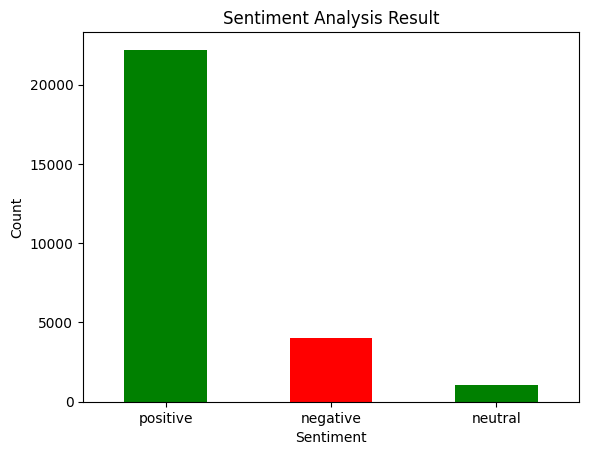

In [10]:
# Plot jumlah sentimen
sentiment_counts.plot(kind="bar", color=["green", "red"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Result")
plt.xticks(rotation=0)
plt.show()

In [6]:
stopwords_kustom = {
    "aja", "ga", "gk", "gak", "udah", "udh", "ok", "lah", "sih", "banget", "bgt",
    "cuma", "lagi", "tp", "dr", "krn", "dgn", "yg", "tdk", "blm", "sm", "sdh", "mn", 
    "jg", "sy", "sya", "gw", "gue", "nya", "ya"
}
    
def bersihkan_teks(teks):
    if isinstance(teks, str):
        teks = teks.lower()
        teks = re.sub(r'[^\w\s]', '', teks)
        kata_kata = word_tokenize(teks)

        # Ambil stopword dari bahasa Indonesia dan Inggris
        stop_words_ind = set(stopwords.words('indonesian'))
        stop_words_eng = set(stopwords.words('english'))

        # Gabungkan semua stopword
        stop_words = stop_words_ind.union(stop_words_eng).union(stopwords_kustom)

        # Hapus stopword
        kata_kata = [kata for kata in kata_kata if kata not in stop_words]
        return kata_kata
    else:
        return []

df['Kata_Bersih'] = df['Komentar'].apply(bersihkan_teks)


In [11]:
df

,Nama,Rating,Komentar,Tanggal,Kata_Bersih,Sentiment
0,Pengguna Google,4,👍👍👍👍👍👍🫰🫰✌️,2025-10-13 09:56:05,[],positive
1,Pengguna Google,5,Nama bayi Indonesia perempuan itu l dan udah p...,2025-10-13 09:47:37,"[nama, bayi, indonesia, perempuan, l, pigi, in...",positive
2,Pengguna Google,5,bagus banget keren,2025-10-13 09:26:27,"[bagus, keren]",positive
3,Pengguna Google,5,sangat bermanfaat,2025-10-13 09:16:14,[bermanfaat],positive
4,Pengguna Google,4,ini Apilkasi terbaik dan terpintar,2025-10-13 08:49:20,"[apilkasi, terbaik, terpintar]",positive
...,...,...,...,...,...,...
27245,Braiyen King,5,Bagus banget gak ada iklannya plus jumlah chat...,2023-08-27 01:39:01,"[bagus, iklannya, plus, chat, dibatasi, dikasi...",positive
27246,Lulu Nuzulul FA,5,"Aplikasinya sangat membantu, terimakasih cici ...",2023-08-26 12:12:04,"[aplikasinya, membantu, terimakasih, cici, teman]",positive
27247,Mahmud,1,Aplikasi merusak data jgn donlod,2023-08-26 07:28:22,"[aplikasi, merusak, data, jgn, donlod]",negative
27248,Vira Cantik,5,Bagus,2023-08-24 09:01:49,[bagus],positive


In [12]:
print(df.isna().sum())
print(df.isnull().sum())

Nama           0
Rating         0
Komentar       0
Tanggal        0
Kata_Bersih    0
Sentiment      0
dtype: int64
Nama           0
Rating         0
Komentar       0
Tanggal        0
Kata_Bersih    0
Sentiment      0
dtype: int64


In [13]:
df["Kata_Bersih"] = df["Kata_Bersih"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
print(df.duplicated().sum())

1


In [16]:
# Hitung frekuensi kata untuk setiap sentimen dengan split()
kata_positif = Counter([kata for daftar_kata in df[df['Sentiment'] == 'positive']['Kata_Bersih'] for kata in daftar_kata.split()])
kata_negatif = Counter([kata for daftar_kata in df[df['Sentiment'] == 'negative']['Kata_Bersih'] for kata in daftar_kata.split()])

Visualisasi Kata yang sering muncul

In [18]:
print("\nKata-kata umum dalam sentimen negatif:")
kata_negatif.most_common(50)


Kata-kata umum dalam sentimen negatif:


[('cici', 967),
 ('aplikasi', 643),
 ('salah', 609),
 ('bagus', 419),
 ('jelek', 386),
 ('ai', 370),
 ('apk', 249),
 ('bahasa', 228),
 ('kasih', 216),
 ('nilai', 211),
 ('jawabannya', 207),
 ('ku', 195),
 ('tolong', 177),
 ('bintang', 172),
 ('download', 162),
 ('suka', 161),
 ('bikin', 158),
 ('sesuai', 157),
 ('pas', 156),
 ('update', 136),
 ('pake', 134),
 ('1', 126),
 ('gambar', 120),
 ('inggris', 120),
 ('iklan', 113),
 ('membantu', 112),
 ('kalo', 111),
 ('maaf', 110),
 ('chat', 107),
 ('pr', 102),
 ('tau', 100),
 ('foto', 97),
 ('tugas', 97),
 ('gara', 95),
 ('kadang', 94),
 ('karna', 94),
 ('gpt', 90),
 ('bener', 89),
 ('indonesia', 88),
 ('mending', 87),
 ('gua', 84),
 ('bilang', 81),
 ('pakai', 78),
 ('orang', 77),
 ('nyambung', 73),
 ('aneh', 73),
 ('bot', 73),
 ('perbaiki', 71),
 ('nggak', 71),
 ('nanya', 69)]

In [19]:
print("\nKata-kata umum dalam sentimen positif:")
kata_positif.most_common(50)


Kata-kata umum dalam sentimen positif:


[('bagus', 7827),
 ('cici', 6805),
 ('aplikasi', 5114),
 ('membantu', 4361),
 ('suka', 1787),
 ('apk', 1205),
 ('kasih', 1096),
 ('curhat', 958),
 ('ai', 944),
 ('tugas', 918),
 ('pr', 817),
 ('keren', 782),
 ('teman', 777),
 ('belajar', 761),
 ('seru', 761),
 ('bintang', 724),
 ('ku', 713),
 ('aplikasinya', 688),
 ('berguna', 676),
 ('mantap', 633),
 ('kalo', 529),
 ('terimakasih', 525),
 ('deh', 499),
 ('makasih', 496),
 ('5', 467),
 ('ngobrol', 459),
 ('sekolah', 457),
 ('pokoknya', 451),
 ('download', 444),
 ('karna', 414),
 ('terima', 407),
 ('tau', 407),
 ('tolong', 398),
 ('mudah', 387),
 ('bikin', 366),
 ('fitur', 365),
 ('cocok', 360),
 ('semoga', 360),
 ('orang', 357),
 ('bahasa', 354),
 ('baguss', 343),
 ('senang', 337),
 ('temen', 333),
 ('bermanfaat', 332),
 ('cerita', 322),
 ('bantu', 317),
 ('cepat', 311),
 ('good', 287),
 ('foto', 282),
 ('kadang', 280)]

C:\Users\Sinta\AppData\Local\Temp\ipykernel_18240\1882581297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='Blues_r')
C:\Users\Sinta\AppData\Local\Temp\ipykernel_18240\1882581297.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='Reds_r')


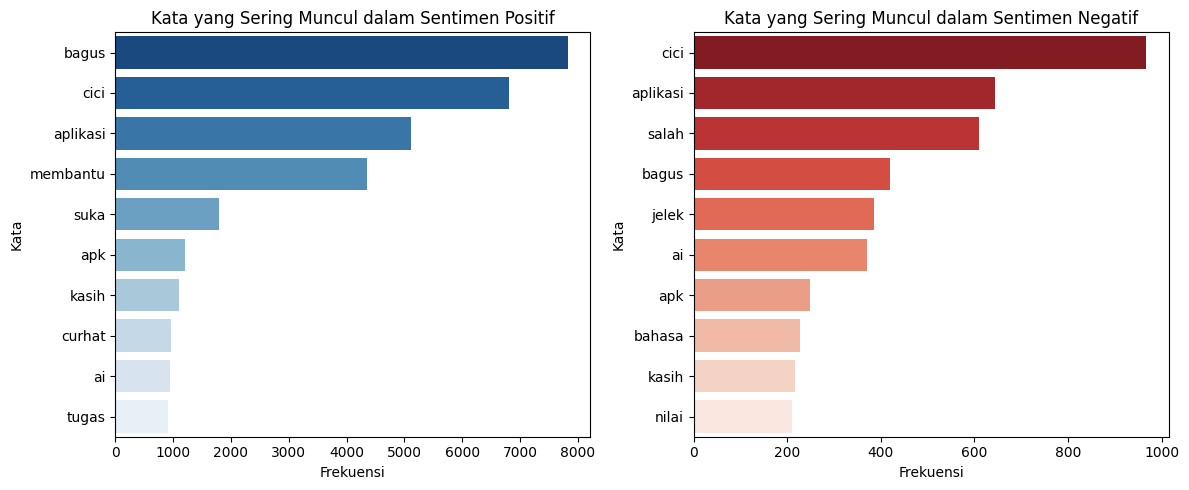

In [20]:
# Konversi ke DataFrame untuk visualisasi
df_positif = pd.DataFrame(kata_positif.most_common(10), columns=['Kata', 'Frekuensi'])
df_negatif = pd.DataFrame(kata_negatif.most_common(10), columns=['Kata', 'Frekuensi'])

# Plot bar chart untuk kata-kata dalam sentimen positif
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='Blues_r')
plt.title('Kata yang Sering Muncul dalam Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Plot bar chart untuk kata-kata dalam sentimen negatif
plt.subplot(1, 2, 2)
sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='Reds_r')
plt.title('Kata yang Sering Muncul dalam Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [18]:
# Ubah kolom Tanggal menjadi format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Mengelompokkan jumlah komentar berdasarkan tanggal
df_grouped = df.groupby(df["Tanggal"].dt.date).size().reset_index(name="Jumlah Komentar")

# Menampilkan tabel hasil
print(df_grouped)

         Tanggal  Jumlah Komentar
0     2021-01-06               44
1     2021-01-07              200
2     2021-01-08              161
3     2021-01-09              167
4     2021-01-10              122
...          ...              ...
1515  2025-03-23              109
1516  2025-03-24              108
1517  2025-03-25              413
1518  2025-03-26              171
1519  2025-03-27               67

[1520 rows x 2 columns]


In [28]:
df['Kata_Bersih'] = df['Kata_Bersih'].astype(str)

# Mengecek jumlah data yang duplikat
df.duplicated().sum()

1

### Ekstraksi Fitur (Feature Engineering)

#### TF-IDF (Term Frequency - Inverse Documents Frequency)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Target label (sentimen)
y = df["Sentiment"].map({"positive": 1, "negative": -1})
y = y.dropna()
df = df.loc[y.index] 

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df["Kata_Bersih"]).toarray()


# Lihat fitur TF-IDF
print(tfidf_vectorizer.get_feature_names_out()[:20])


['10' '100' '1000' '18' '20' '30' '50' 'abis' 'ad' 'adain' 'admin' 'aga'
 'agama' 'ah' 'ahli' 'ai' 'ainya' 'aj' 'ajak' 'ak']


In [23]:
import pickle

# Simpan TF-IDF vectorizer
with open("models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

### Modelling Dengan Machine Learning atau Deep Learning

#### Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
y

0        1
1        1
2        1
3        1
4        1
        ..
27245    1
27246    1
27247   -1
27248    1
27249    1
Name: Sentiment, Length: 26203, dtype: int64

### Melatih Model Machine Learning

#### Model Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

# Buat model Naive Bayes
model_nb = MultinomialNB(alpha=5.0)
model_nb.fit(X_res, y_res)

MultinomialNB(alpha=5.0)

Evaluasi model Naive Bayes

In [38]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi pada data uji
y_pred = model_nb.predict(X_test_tf)
# Evaluasi performa model
# print("Akurasi Training:", accuracy_score(y_train_tf, ))
print("Akurasi Testing:", accuracy_score(y_test_tf, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test_tf, y_pred))

Akurasi Testing: 0.800801373783629
Laporan Klasifikasi:
               precision    recall  f1-score   support

        -1.0       0.41      0.80      0.55       779
         1.0       0.96      0.80      0.87      4462

    accuracy                           0.80      5241
   macro avg       0.69      0.80      0.71      5241
weighted avg       0.88      0.80      0.82      5241



Confussion Matriks Naive Bayes

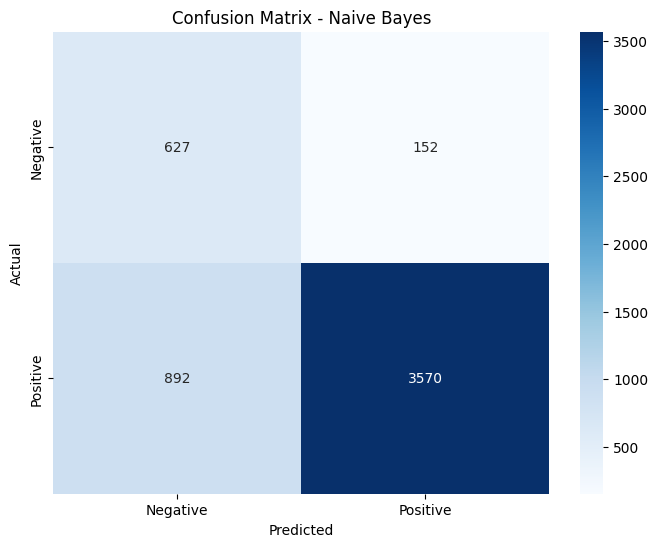

In [39]:
conf_matrix = confusion_matrix(y_test_tf, y_pred)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Testing model Naive Bayes

In [40]:
komentar_baru = ["Aplikasinya jelek, pelayannanya kurang!", "Saya sangat puas dengan pelayanannya."]

# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen
prediksi = model_nb.predict(X_baru)

# Tampilkan hasil
for komentar, sentimen in zip(komentar_baru, prediksi):
    print(f"Komentar: {komentar} → Sentimen: {'Positif' if sentimen == 1 else 'Negatif'}")


Komentar: Aplikasinya jelek, pelayannanya kurang! → Sentimen: Negatif
Komentar: Saya sangat puas dengan pelayanannya. → Sentimen: Positif


In [53]:
import joblib

# Simpan model ke file
joblib.dump(model_nb, 'models/model_naive_bayes.pkl')

['models/model_naive_bayes.pkl']

#### Model Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=500, C=10, solver= "saga", class_weight="balanced")
model_lr.fit(X_train_tf, y_train_tf)
y_pred_lr = model_lr.predict(X_test_tf)

Evaluasi Model Logistic Regression

In [ ]:
# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test_tf, y_pred_lr))
print("Laporan Klasifikasi:\n", classification_report(y_test_tf, y_pred_lr))

Akurasi: 0.9098832773878548
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     20820
           1       0.95      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



Confussion Matrix Logistic Regression

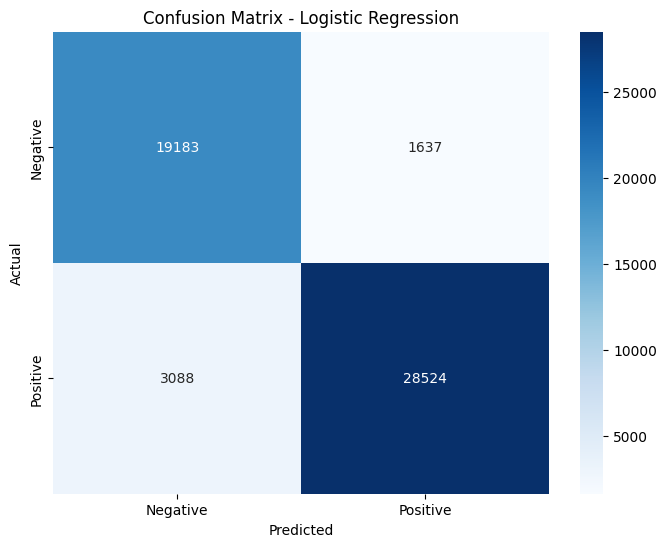

In [ ]:
# Confussion matriks Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_tf, y_pred_lr)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Testing model Logistic Regression

In [ ]:
komentar_baru = ["Uang yang saya transfer telat terkirim", "Cepat banget kalo soal transfer", "aplikasinya bagus cuyy!", "Csnya gak bener sumpah, lama banget pelayanannya"]

# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen
prediksi = model_lr.predict(X_baru)

# Tampilkan hasil
for komentar, sentimen in zip(komentar_baru, prediksi):
    print(f"Komentar: {komentar} → Sentimen: {'Positif' if sentimen == 1 else 'Negatif'}")

Komentar: Uang yang saya transfer telat terkirim → Sentimen: Negatif
Komentar: Cepat banget kalo soal transfer → Sentimen: Positif
Komentar: aplikasinya bagus cuyy! → Sentimen: Positif
Komentar: Csnya gak bener sumpah, lama banget pelayanannya → Sentimen: Negatif


In [ ]:
# Simpan model ke file
joblib.dump(model_lr, 'models/model_logistic_regression.pkl')

['models/model_logistic_regression.pkl']

### Melatih Model dengan Deep Learning

In [25]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [26]:
def create_cnn_lstm_model(input_shape):
    model = models.Sequential()
    
    # CNN Layer
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM Layer
    model.add(layers.LSTM(64))
    
    # Fully Connected Layer
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
    
    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

cnn_lstm_model = create_cnn_lstm_model((X_train_w2v.shape[1], 1))
cnn_lstm_model.summary()

c:\Users\Sinta\anaconda3\envs\laskarai\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

class StopAtAccuracy(Callback):
    def __init__(self, target_acc=0.95):
        super(StopAtAccuracy, self).__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("val_accuracy")
        if acc is not None and acc >= self.target_acc:
            print(f"\n✅ Target val_accuracy {self.target_acc*100:.2f}% tercapai, menghentikan training...")
            self.model.stop_training = True

In [33]:
stop_acc_callback = StopAtAccuracy(target_acc=0.95) 

# Latih model
history = cnn_lstm_model.fit(
    X_train_w2v, y_train_w2v,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_w2v, y_test_w2v),
    callbacks=[lr_scheduler, early_stop, stop_acc_callback],
    verbose=1
    
)

Epoch 1/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 210s 32ms/step - accuracy: 0.9297 - loss: 0.1931 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 2/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 236s 36ms/step - accuracy: 0.9300 - loss: 0.1934 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 3/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 324s 49ms/step - accuracy: 0.9296 - loss: 0.1958 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 4/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 339s 52ms/step - accuracy: 0.9297 - loss: 0.1945 - val_accuracy: 0.9103 - val_loss: 0.2478 - learning_rate: 1.0000e-06
Epoch 5/50
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 420s 64ms/step - accuracy: 0.9286 - loss: 0.1947 - val_accuracy: 0.9103 - val_loss: 0.2479 - learning_rate: 1.0000e-06
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [39]:
cnn_lstm_model.export("models/cnn_lstm_model_tf_v2")

INFO:tensorflow:Assets written to: models/cnn_lstm_model_tf_v2\assets


INFO:tensorflow:Assets written to: models/cnn_lstm_model_tf_v2\assets


Saved artifact at 'models/cnn_lstm_model_tf_v2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2371044093792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044181088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044404560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044405088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371044376640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000031888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000031536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000130720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371000130368: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
loss, accuracy = cnn_lstm_model.evaluate(X_test_w2v, y_test_w2v)
print(f"Test Accuracy: {accuracy:.4f}")

1639/1639 [==============================] - 33s 20ms/step - loss: 0.2480 - accuracy: 0.9108
Test Accuracy: 0.9108


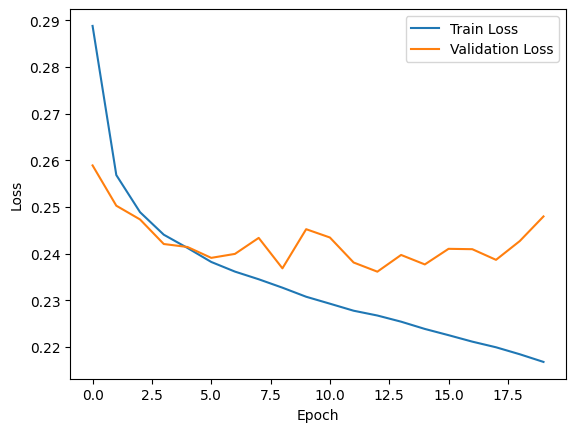

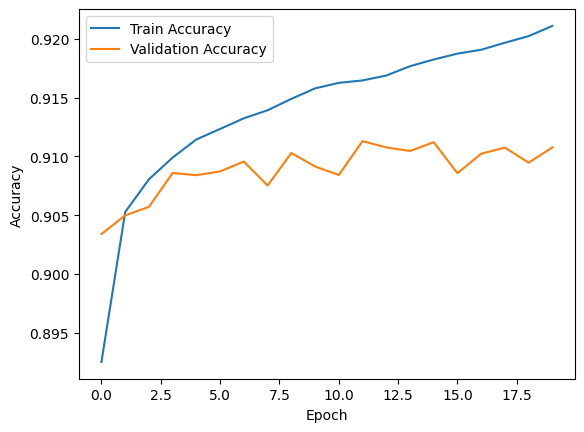

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediksi probabilitas
y_pred_prob = cnn_lstm_model.predict(X_test_w2v)

# Konversi probabilitas ke kelas biner (0 atau 1)
y_pred_cnn_lstm = (y_pred_prob > 0.5).astype(int)

# Classification Report
print("Laporan Klasifikasi:\n", classification_report(y_test_w2v, y_pred_cnn_lstm))

1639/1639 [==============================] - 36s 20ms/step
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     20820
         1.0       0.95      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



Confusion Matrix model CNN dengan LSTM

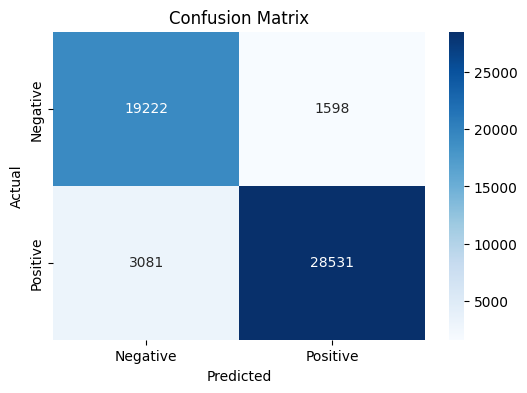

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_w2v, y_pred_cnn_lstm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Testing model CNN dengan LSTM

In [ ]:
new_texts = ["Pelayanan yang sangat baik!", 
             "jelek banget aplikasinya!."]
# Ubah teks menjadi vektor Word2Vec

X_new_w2v = np.array([get_sentence_vector(text, model_w2v) for text in new_texts])

# Prediksi dengan model yang telah dilatih
predictions = cnn_lstm_model.predict(X_new_w2v)

# Konversi hasil sigmoid menjadi label (0 atau 1)
predicted_labels = (predictions > 0.5).astype(int)

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    sentiment = "Positif" if label == 1 else "Negatif"
    print(f"Teks: {text} -> Sentimen: {sentiment}")

1/1 [==============================] - 0s 60ms/step
Teks: Pelayanan yang sangat baik! -> Sentimen: Positif
Teks: jelek banget aplikasinya!. -> Sentimen: Negatif


In [ ]:
cnn_lstm_model.save('models/cnn_lstm_model.h5')